In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [20]:
df_url = "https://raw.githubusercontent.com/EZags/Milliman-Project-2025/main/merged_df1.csv"
df = pd.read_csv(df_url)
#Drop non-numeric columns
df

,county_state,fips,population,dep_prevalence,Households Total,Households Mean income (dollars),Households Median income (dollars),Premature Death Deaths,Premature Death Years of Potential Life Lost Rate,Poor Physical Health Days Average Number of Physically Unhealthy Days,Low Birth Weight % Low Birth Weight,Poor Mental Health Days Average Number of Mentally Unhealthy Days,Poor or Fair Health % Fair or Poor Health,Flu Vaccinations % Vaccinated,Access to Exercise Opportunities % With Access to Exercise Opportunities,Food Environment Index Food Environment Index,Primary Care Physicians # Primary Care Physicians,Primary Care Physicians Primary Care Physicians Rate,Primary Care Physicians Primary Care Physicians Ratio,Mental Health Providers # Mental Health Providers,Mental Health Providers Mental Health Provider Rate,Mental Health Providers Mental Health Provider Ratio,Dentists # Dentists,Dentists Dentist Rate,Dentists Dentist Ratio,Preventable Hospital Stays Preventable Hospitalization Rate,Mammography Screening % with Annual Mammogram,Uninsured # Uninsured,Uninsured % Uninsured,Severe Housing Problems % Severe Housing Problems,Severe Housing Problems Severe Housing Cost Burden,Severe Housing Problems Overcrowding,Severe Housing Problems Inadequate Facilities,Driving Alone to Work % Drive Alone to Work,Long Commute - Driving Alone # Workers who Drive Alone,Long Commute - Driving Alone % Long Commute - Drives Alone,Air Pollution: Particulate Matter Average Daily PM2.5,Drinking Water Violations Presence of Water Violation,Broadband Access % Households with Broadband Access,Broadband Access # Households with Broadband Access,Library Access Visits per service area population,Some College # Some College,Some College Population,Some College % Some College,High School Completion # Completed High School,High School Completion Population,High School Completion % Completed High School,Unemployment # Unemployed,Unemployment Labor Force,Unemployment % Unemployed,Income Inequality 80th Percentile Income,Income Inequality 20th Percentile Income,Income Inequality Income Ratio,Children in Poverty % Children in Poverty,Injury Deaths # Injury Deaths,Injury Deaths Injury Death Rate,Social Associations # Associations,Social Associations Social Association Rate,Child Care Cost Burden % Household Income Required for Child Care Expenses
0,"AUTAUGA COUNTY, ALABAMA",1001,60436,18,NaN,NaN,NaN,1008.0,9938.263382,4.300364,9.995826,5.832901,17.7,36.0,54.491965,6.8,26.0,43.99695,2273:1,22.0,36.45885,2743:1,18.0,30.12099,3320:1,4365.0,46.0,4053.0,8.190361,13.520933,11.749710,1.459620,1.029513,84.916222,26976.0,42.1,9.3,No,90.880433,20469.0,1.124569,9518.0,15507.0,61.378732,36804.0,40767.0,90.278902,591.0,27000.0,2.188889,132562.0,31018.0,4.273712,17.0,189.0,65.975725,67.0,11.211700,21.835108
1,"BALDWIN COUNTY, ALABAMA",1003,254107,18,105698.0,98279.0,72915.0,3944.0,8957.112686,3.876436,8.133286,6.020778,17.0,44.0,61.624390,7.4,150.0,62.68440,1595:1,306.0,120.70673,828:1,116.0,47.07124,2124:1,2888.0,45.0,19478.0,10.212342,11.968116,10.149443,1.462324,0.705356,80.296745,108241.0,38.1,7.8,No,89.750851,84942.0,3.862097,36106.0,55678.0,64.847875,157767.0,171988.0,91.731400,2380.0,104409.0,2.279497,141920.0,32554.0,4.359526,14.1,953.0,82.420053,239.0,9.698298,19.354057
2,"BARBOUR COUNTY, ALABAMA",1005,24644,19,NaN,NaN,NaN,587.0,12738.656137,5.431030,12.454212,6.339986,28.4,39.0,54.858661,6.2,10.0,40.05768,2496:1,7.0,28.47265,3512:1,8.0,32.38080,3088:1,3560.0,47.0,2025.0,12.117042,13.806381,9.512335,4.345435,0.605061,82.408501,8470.0,37.5,8.8,No,72.301762,6565.0,0.693579,2869.0,6509.0,44.077431,13717.0,17628.0,77.813705,352.0,7944.0,4.431017,99138.0,17658.0,5.614339,34.8,106.0,85.603993,22.0,8.904720,28.579628
3,"BIBB COUNTY, ALABAMA",1007,21890,24,NaN,NaN,NaN,509.0,11708.948038,5.055619,10.017472,6.565945,25.1,31.0,43.390302,7.3,15.0,66.73488,1498:1,8.0,36.58314,2734:1,5.0,22.72211,4401:1,5029.0,36.0,1758.0,10.835799,11.926606,9.051054,0.917431,1.976006,87.893346,83

In [21]:
#Split the county_state column into two separate columns
df[['county', 'state']] = df['county_state'].str.split(',', expand=True)
#Drop the original county_state column
df.drop(columns=['county_state'], inplace=True)
#Drop the word county from the county column
df['county'] = df['county'].str.replace(' COUNTY', '')
#Move the county and state columns to the front of the dataframe
df = df[['county', 'state'] + [col for col in df.columns if col not in ['county', 'state']]]
#Drop any rows with missing values in the state or county columns
df.dropna(subset=['county', 'state'], inplace=True)
df.head()

C:\Users\ezago\AppData\Local\Temp\ipykernel_45584\696894251.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['county', 'state'], inplace=True)


,county,state,fips,population,dep_prevalence,Households Total,Households Mean income (dollars),Households Median income (dollars),Premature Death Deaths,Premature Death Years of Potential Life Lost Rate,Poor Physical Health Days Average Number of Physically Unhealthy Days,Low Birth Weight % Low Birth Weight,Poor Mental Health Days Average Number of Mentally Unhealthy Days,Poor or Fair Health % Fair or Poor Health,Flu Vaccinations % Vaccinated,Access to Exercise Opportunities % With Access to Exercise Opportunities,Food Environment Index Food Environment Index,Primary Care Physicians # Primary Care Physicians,Primary Care Physicians Primary Care Physicians Rate,Primary Care Physicians Primary Care Physicians Ratio,Mental Health Providers # Mental Health Providers,Mental Health Providers Mental Health Provider Rate,Mental Health Providers Mental Health Provider Ratio,Dentists # Dentists,Dentists Dentist Rate,Dentists Dentist Ratio,Preventable Hospital Stays Preventable Hospitalization Rate,Mammography Screening % with Annual Mammogram,Uninsured # Uninsured,Uninsured % Uninsured,Severe Housing Problems % Severe Housing Problems,Severe Housing Problems Severe Housing Cost Burden,Severe Housing Problems Overcrowding,Severe Housing Problems Inadequate Facilities,Driving Alone to Work % Drive Alone to Work,Long Commute - Driving Alone # Workers who Drive Alone,Long Commute - Driving Alone % Long Commute - Drives Alone,Air Pollution: Particulate Matter Average Daily PM2.5,Drinking Water Violations Presence of Water Violation,Broadband Access % Households with Broadband Access,Broadband Access # Households with Broadband Access,Library Access Visits per service area population,Some College # Some College,Some College Population,Some College % Some College,High School Completion # Completed High School,High School Completion Population,High School Completion % Completed High School,Unemployment # Unemployed,Unemployment Labor Force,Unemployment % Unemployed,Income Inequality 80th Percentile Income,Income Inequality 20th Percentile Income,Income Inequality Income Ratio,Children in Poverty % Children in Poverty,Injury Deaths # Injury Deaths,Injury Deaths Injury Death Rate,Social Associations # Associations,Social Associations Social Association Rate,Child Care Cost Burden % Household Income Required for Child Care Expenses
0,AUTAUGA,ALABAMA,1001,60436,18,NaN,NaN,NaN,1008.0,9938.263382,4.300364,9.995826,5.832901,17.7,36.0,54.491965,6.8,26.0,43.99695,2273:1,22.0,36.45885,2743:1,18.0,30.12099,3320:1,4365.0,46.0,4053.0,8.190361,13.520933,11.749710,1.459620,1.029513,84.916222,26976.0,42.1,9.3,No,90.880433,20469.0,1.124569,9518.0,15507.0,61.378732,36804.0,40767.0,90.278902,591.0,27000.0,2.188889,132562.0,31018.0,4.273712,17.0,189.0,65.975725,67.0,11.211700,21.835108
1,BALDWIN,ALABAMA,1003,254107,18,105698.0,98279.0,72915.0,3944.0,8957.112686,3.876436,8.133286,6.020778,17.0,44.0,61.624390,7.4,150.0,62.68440,1595:1,306.0,120.70673,828:1,116.0,47.07124,2124:1,2888.0,45.0,19478.0,10.212342,11.968116,10.149443,1.462324,0.705356,80.296745,108241.0,38.1,7.8,No,89.750851,84942.0,3.862097,36106.0,55678.0,64.847875,157767.0,171988.0,91.731400,2380.0,104409.0,2.279497,141920.0,32554.0,4.359526,14.1,953.0,82.420053,239.0,9.698298,19.354057
2,BARBOUR,ALABAMA,1005,24644,19,NaN,NaN,NaN,587.0,12738.656137,5.431030,12.454212,6.339986,28.4,39.0,54.858661,6.2,10.0,40.05768,2496:1,7.0,28.47265,3512:1,8.0,32.38080,3088:1,3560.0,47.0,2025.0,12.117042,13.806381,9.512335,4.345435,0.605061,82.408501,8470.0,37.5,8.8,No,72.301762,6565.0,0.693579,2869.0,6509.0,44.077431,13717.0,17628.0,77.813705,352.0,7944.0,4.431017,99138.0,17658.0,5.614339,34.8,106.0,85.603993,22.0,8.904720,28.579628
3,BIBB,ALABAMA,1007,21890,24,NaN,NaN,NaN,509.0,11708.948038,5.055619,10.017472,6.565945,25.1,31.0,43.390302,7.3,15.0,66.73488,1498:1,8.0,36.58314,2734:1,5.0,22.72211,4401:1,5029.0,36.0,1758.0,10.835799,11.926606,9.051054,0.917431,1.976006,87.893346,8326.0,53.5,8.6,Yes,81.151763,6144.0,1.005

Imputation

In [22]:
#Determine the number of missing values in each column
missing_values = df.isnull().sum()
missing_values
#Determine the percentage of missing values in each column
missing_percentage = (missing_values / len(df)) * 100
missing_percentage
#Determine the missing values in each column for the state of Connecticut
missing_values_ct = df[df['state'] == 'CONNECTICUT'].isnull().sum()
missing_values_ct

county                                                                           0
state                                                                            0
fips                                                                             0
population                                                                       0
dep_prevalence                                                                   0
Households Total                                                              2360
Households Mean income (dollars)                                              2360
Households Median income (dollars)                                            2360
Premature Death Deaths                                                         305
Premature Death Years of Potential Life Lost Rate                              305
Poor Physical Health Days Average Number of Physically Unhealthy Days           87
Low Birth Weight % Low Birth Weight                                            171
Poor

county                                                                         0.000000
state                                                                          0.000000
fips                                                                           0.000000
population                                                                     0.000000
dep_prevalence                                                                 0.000000
Households Total                                                              73.634945
Households Mean income (dollars)                                              73.634945
Households Median income (dollars)                                            73.634945
Premature Death Deaths                                                         9.516381
Premature Death Years of Potential Life Lost Rate                              9.516381
Poor Physical Health Days Average Number of Physically Unhealthy Days          2.714509
Low Birth Weight % Low Birth Wei

county                                                                        0
state                                                                         0
fips                                                                          0
population                                                                    0
dep_prevalence                                                                0
Households Total                                                              0
Households Mean income (dollars)                                              0
Households Median income (dollars)                                            0
Premature Death Deaths                                                        0
Premature Death Years of Potential Life Lost Rate                             0
Poor Physical Health Days Average Number of Physically Unhealthy Days         0
Low Birth Weight % Low Birth Weight                                           0
Poor Mental Health Days Average Number o

In [23]:
#Clear any whitespace from the state and county columns
df['state'] = df['state'].str.strip()
#Defines the four regions of the US
regions = {
    'Northeast': ['CONNECTICUT', 'MAINE', 'MASSACHUSETTS', 'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW YORK', 'PENNSYLVANIA', 'RHODE ISLAND', 'VERMONT'],
    'Midwest': ['ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'MICHIGAN', 'MINNESOTA', 'MISSOURI', 'NEBRASKA', 'NORTH DAKOTA', 'OHIO', 'SOUTH DAKOTA', 'WISCONSIN'],
    'South': ['ALABAMA', 'ARKANSAS', 'DELAWARE', 'FLORIDA', 'GEORGIA', 'KENTUCKY', 'LOUISIANA', 'MARYLAND', 'MISSISSIPPI', 'NORTH CAROLINA',
              'OKLAHOMA', 'SOUTH CAROLINA', 'TENNESSEE', 'TEXAS', 'VIRGINIA', 'WEST VIRGINIA'],
    'West': ['ALASKA', 'ARIZONA', 'CALIFORNIA', 'COLORADO', 'HAWAII', 'IDAHO', 'MONTANA', 'NEVADA',
             'NEW MEXICO','OREGON','UTAH','WASHINGTON','WYOMING']
}
#Create a new column called region and assign the region based on the state in the state column
state_to_region = {state: region for region, states in regions.items() for state in states}
df['region'] = df['state'].map(state_to_region)
#Convert the region column to a categorical variable
df['region'] = df['region'].astype('category')
#Convert the state column to a categorical variable
df['state'] = df['state'].astype('category')
#Convert the county column to a categorical variable
df['county'] = df['county'].astype('category')
#Move the region column to the front of the dataframe
df = df[['county', 'state', 'region'] + [col for col in df.columns if col not in ['region', 'county', 'state']]]
df.head()

C:\Users\ezago\AppData\Local\Temp\ipykernel_45584\4199920752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state'] = df['state'].str.strip()
C:\Users\ezago\AppData\Local\Temp\ipykernel_45584\4199920752.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['region'] = df['state'].map(state_to_region)
C:\Users\ezago\AppData\Local\Temp\ipykernel_45584\4199920752.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

,county,state,region,fips,population,dep_prevalence,Households Total,Households Mean income (dollars),Households Median income (dollars),Premature Death Deaths,Premature Death Years of Potential Life Lost Rate,Poor Physical Health Days Average Number of Physically Unhealthy Days,Low Birth Weight % Low Birth Weight,Poor Mental Health Days Average Number of Mentally Unhealthy Days,Poor or Fair Health % Fair or Poor Health,Flu Vaccinations % Vaccinated,Access to Exercise Opportunities % With Access to Exercise Opportunities,Food Environment Index Food Environment Index,Primary Care Physicians # Primary Care Physicians,Primary Care Physicians Primary Care Physicians Rate,Primary Care Physicians Primary Care Physicians Ratio,Mental Health Providers # Mental Health Providers,Mental Health Providers Mental Health Provider Rate,Mental Health Providers Mental Health Provider Ratio,Dentists # Dentists,Dentists Dentist Rate,Dentists Dentist Ratio,Preventable Hospital Stays Preventable Hospitalization Rate,Mammography Screening % with Annual Mammogram,Uninsured # Uninsured,Uninsured % Uninsured,Severe Housing Problems % Severe Housing Problems,Severe Housing Problems Severe Housing Cost Burden,Severe Housing Problems Overcrowding,Severe Housing Problems Inadequate Facilities,Driving Alone to Work % Drive Alone to Work,Long Commute - Driving Alone # Workers who Drive Alone,Long Commute - Driving Alone % Long Commute - Drives Alone,Air Pollution: Particulate Matter Average Daily PM2.5,Drinking Water Violations Presence of Water Violation,Broadband Access % Households with Broadband Access,Broadband Access # Households with Broadband Access,Library Access Visits per service area population,Some College # Some College,Some College Population,Some College % Some College,High School Completion # Completed High School,High School Completion Population,High School Completion % Completed High School,Unemployment # Unemployed,Unemployment Labor Force,Unemployment % Unemployed,Income Inequality 80th Percentile Income,Income Inequality 20th Percentile Income,Income Inequality Income Ratio,Children in Poverty % Children in Poverty,Injury Deaths # Injury Deaths,Injury Deaths Injury Death Rate,Social Associations # Associations,Social Associations Social Association Rate,Child Care Cost Burden % Household Income Required for Child Care Expenses
0,AUTAUGA,ALABAMA,South,1001,60436,18,NaN,NaN,NaN,1008.0,9938.263382,4.300364,9.995826,5.832901,17.7,36.0,54.491965,6.8,26.0,43.99695,2273:1,22.0,36.45885,2743:1,18.0,30.12099,3320:1,4365.0,46.0,4053.0,8.190361,13.520933,11.749710,1.459620,1.029513,84.916222,26976.0,42.1,9.3,No,90.880433,20469.0,1.124569,9518.0,15507.0,61.378732,36804.0,40767.0,90.278902,591.0,27000.0,2.188889,132562.0,31018.0,4.273712,17.0,189.0,65.975725,67.0,11.211700,21.835108
1,BALDWIN,ALABAMA,South,1003,254107,18,105698.0,98279.0,72915.0,3944.0,8957.112686,3.876436,8.133286,6.020778,17.0,44.0,61.624390,7.4,150.0,62.68440,1595:1,306.0,120.70673,828:1,116.0,47.07124,2124:1,2888.0,45.0,19478.0,10.212342,11.968116,10.149443,1.462324,0.705356,80.296745,108241.0,38.1,7.8,No,89.750851,84942.0,3.862097,36106.0,55678.0,64.847875,157767.0,171988.0,91.731400,2380.0,104409.0,2.279497,141920.0,32554.0,4.359526,14.1,953.0,82.420053,239.0,9.698298,19.354057
2,BARBOUR,ALABAMA,South,1005,24644,19,NaN,NaN,NaN,587.0,12738.656137,5.431030,12.454212,6.339986,28.4,39.0,54.858661,6.2,10.0,40.05768,2496:1,7.0,28.47265,3512:1,8.0,32.38080,3088:1,3560.0,47.0,2025.0,12.117042,13.806381,9.512335,4.345435,0.605061,82.408501,8470.0,37.5,8.8,No,72.301762,6565.0,0.693579,2869.0,6509.0,44.077431,13717.0,17628.0,77.813705,352.0,7944.0,4.431017,99138.0,17658.0,5.614339,34.8,106.0,85.603993,22.0,8.904720,28.579628
3,BIBB,ALABAMA,South,1007,21890,24,NaN,NaN,NaN,509.0,11708.948038,5.055619,10.017472,6.565945,25.1,31.0,43.390302,7.3,15.0,66.73488,1498:1,8.0,36.58314,2734:1,5.0,22.72211,4401:1,5029.0,36.0,1758.0,10.835799,11.926606,9.051054,0.917431,1.976006,87.893346,8326.0,53.5

In [24]:
#A function that imputes the mean of a column and fills in the missing values with the mean
def impute_mean(df1, column):
    mean_value = df1[column].mean()
    df1[column].fillna(mean_value, inplace=True)
    return df1

#A function that imputes using KNN
def impute_knn(df_1, column):
    knn_imputer = KNNImputer(n_neighbors=5)
    df_1[column] = knn_imputer.fit_transform(df_1[[column]])
    return df_1

#Drops all columns in df with over 40% missing values
df.drop(columns=missing_percentage[missing_percentage > 40].index, inplace=True)

#Iterate through the missing values dataframe choosing columns with a missing percentage < 5% for mean imputation and > 5% for KNN imputation, make sure only numeric columns are selected
numeric_columns = df.select_dtypes(include=[np.number]).columns
missing_percentage = missing_percentage[missing_percentage.index.isin(numeric_columns)]
for column in missing_percentage[missing_percentage < 5].index:
    df = impute_mean(df, column)
for column in missing_percentage[missing_percentage > 5].index:
    df = impute_knn(df, column)

#Change settings to display all columns in the dataframe
pd.set_option('display.max_columns', None)

#Check for any remaining missing values
missing_values = df.isnull().sum()
missing_values

C:\Users\ezago\AppData\Local\Temp\ipykernel_45584\1271961381.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[column].fillna(mean_value, inplace=True)


county                                                                          0
state                                                                           0
region                                                                         77
fips                                                                            0
population                                                                      0
dep_prevalence                                                                  0
Premature Death Deaths                                                          0
Premature Death Years of Potential Life Lost Rate                               0
Poor Physical Health Days Average Number of Physically Unhealthy Days           0
Low Birth Weight % Low Birth Weight                                             0
Poor Mental Health Days Average Number of Mentally Unhealthy Days               0
Poor or Fair Health % Fair or Poor Health                                       0
Flu Vaccinations

In [25]:
#Display rows with missing values in the 'region' column
df[df['region'].isnull()]
# Add 'Other' to the categories of the 'region' column
df['region'] = df['region'].cat.add_categories('Other')
# Fill these values with the word "Other"
df['region'].fillna('Other', inplace=True)
#Check for any remaining missing values
missing_values = df.isnull().sum()
missing_values

,county,state,region,fips,population,dep_prevalence,Premature Death Deaths,Premature Death Years of Potential Life Lost Rate,Poor Physical Health Days Average Number of Physically Unhealthy Days,Low Birth Weight % Low Birth Weight,Poor Mental Health Days Average Number of Mentally Unhealthy Days,Poor or Fair Health % Fair or Poor Health,Flu Vaccinations % Vaccinated,Access to Exercise Opportunities % With Access to Exercise Opportunities,Food Environment Index Food Environment Index,Primary Care Physicians # Primary Care Physicians,Primary Care Physicians Primary Care Physicians Rate,Primary Care Physicians Primary Care Physicians Ratio,Mental Health Providers # Mental Health Providers,Mental Health Providers Mental Health Provider Rate,Mental Health Providers Mental Health Provider Ratio,Dentists # Dentists,Dentists Dentist Rate,Dentists Dentist Ratio,Preventable Hospital Stays Preventable Hospitalization Rate,Mammography Screening % with Annual Mammogram,Uninsured # Uninsured,Uninsured % Uninsured,Severe Housing Problems % Severe Housing Problems,Severe Housing Problems Severe Housing Cost Burden,Severe Housing Problems Overcrowding,Severe Housing Problems Inadequate Facilities,Driving Alone to Work % Drive Alone to Work,Long Commute - Driving Alone # Workers who Drive Alone,Long Commute - Driving Alone % Long Commute - Drives Alone,Air Pollution: Particulate Matter Average Daily PM2.5,Drinking Water Violations Presence of Water Violation,Broadband Access % Households with Broadband Access,Broadband Access # Households with Broadband Access,Library Access Visits per service area population,Some College # Some College,Some College Population,Some College % Some College,High School Completion # Completed High School,High School Completion Population,High School Completion % Completed High School,Unemployment # Unemployed,Unemployment Labor Force,Unemployment % Unemployed,Income Inequality 80th Percentile Income,Income Inequality 20th Percentile Income,Income Inequality Income Ratio,Children in Poverty % Children in Poverty,Injury Deaths # Injury Deaths,Injury Deaths Injury Death Rate,Social Associations # Associations,Social Associations Social Association Rate,Child Care Cost Burden % Household Income Required for Child Care Expenses
313,DISTRICT OF COLUMBIA,DISTRICT OF COLUMBIA,NaN,11001,687324,16,9950.00000,9241.413743,3.141542,10.014509,4.889471,12.800000,43.000000,100.000000,8.900000,863.000000,128.796360,776:1,4908.000000,722.857500,138:1,867.00000,129.055690,775:1,2953.000000,35.000000,16917.000000,3.070219,19.665920,16.336241,3.869657,0.817465,28.152132,368917.000000,48.700000,7.800000,Yes,90.167809,289940.000000,3.776424,222281.000000,260809.00000,85.227504,449755.000000,484406.0000,92.846703,19537.000000,398251.000000,4.905700,235940.000000,37090.000000,6.361283,20.700000,3918.000000,113.143046,1975.000000,29.398499,45.939050
3165,ADJUNTAS MUNICIPIO,PUERTO RICO,NaN,72001,0,8,1639.19069,10471.201029,4.457438,8.420263,5.644674,19.569468,41.229907,61.986463,7.455376,83.646485,53.393369,NaN,371.116989,207.186134,NaN,80.49293,48.313023,NaN,2826.410173,42.850914,8180.621552,10.454186,12.743556,9.986196,2.315688,1.175185,77.069848,49968.606799,33.326395,7.649233,NaN,84.356230,36257.830981,2.582856,19155.319538,28252.39846,59.208525,64733.760103,72431.8127,88.756703,1939.808381,53310.542546,3.578066,124556.766225,28326.364223,4.560601,19.006446,454.081081,99.625938,92.799551,11.368901,28.599156
3166,AGUADA MUNICIPIO,PUERTO RICO,NaN,72003,0,13,1639.19069,10471.201029,4.457438,8.420263,5.644674,19.569468,41.229907,61.986463,7.455376,83.646485,53.393369,NaN,371.116989,207.186134,NaN,80.49293,48.313023,NaN,2826.410173,42.850914,8180.621552,10.454186,12.743556,9.986196,2.315688,1.175185,77.069848,49968.606799,33.326395,7.649233,NaN,84.356230,36257.830981,2.582856,19155.319538,28252.39846,59.208525,64733.760103,72431.8127,88.756703,1939.808381,53310.542546,3.578066,124556.766225,28326.364223,4.560601,19.006446,454.081081,99.625938

C:\Users\ezago\AppData\Local\Temp\ipykernel_45584\64394300.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['region'].fillna('Other', inplace=True)


county                                                                          0
state                                                                           0
region                                                                          0
fips                                                                            0
population                                                                      0
dep_prevalence                                                                  0
Premature Death Deaths                                                          0
Premature Death Years of Potential Life Lost Rate                               0
Poor Physical Health Days Average Number of Physically Unhealthy Days           0
Low Birth Weight % Low Birth Weight                                             0
Poor Mental Health Days Average Number of Mentally Unhealthy Days               0
Poor or Fair Health % Fair or Poor Health                                       0
Flu Vaccinations

In [26]:
#Drop all columns that contain the word "Ratio" in the column name
df.drop(columns=[col for col in df.columns if 'Ratio' in col], inplace=True)

In [27]:
#Transform the "Drinking Water Violations" column to a categorical variable
df['Drinking Water Violations Presence of Water Violation'] = df['Drinking Water Violations Presence of Water Violation'].astype('category')
#One hot encode that column
df = pd.get_dummies(df, columns=['Drinking Water Violations Presence of Water Violation'], drop_first=True)
df

,county,state,region,fips,population,dep_prevalence,Premature Death Deaths,Premature Death Years of Potential Life Lost Rate,Poor Physical Health Days Average Number of Physically Unhealthy Days,Low Birth Weight % Low Birth Weight,Poor Mental Health Days Average Number of Mentally Unhealthy Days,Poor or Fair Health % Fair or Poor Health,Flu Vaccinations % Vaccinated,Access to Exercise Opportunities % With Access to Exercise Opportunities,Food Environment Index Food Environment Index,Primary Care Physicians # Primary Care Physicians,Primary Care Physicians Primary Care Physicians Rate,Mental Health Providers # Mental Health Providers,Mental Health Providers Mental Health Provider Rate,Dentists # Dentists,Dentists Dentist Rate,Preventable Hospital Stays Preventable Hospitalization Rate,Mammography Screening % with Annual Mammogram,Uninsured # Uninsured,Uninsured % Uninsured,Severe Housing Problems % Severe Housing Problems,Severe Housing Problems Severe Housing Cost Burden,Severe Housing Problems Overcrowding,Severe Housing Problems Inadequate Facilities,Driving Alone to Work % Drive Alone to Work,Long Commute - Driving Alone # Workers who Drive Alone,Long Commute - Driving Alone % Long Commute - Drives Alone,Air Pollution: Particulate Matter Average Daily PM2.5,Broadband Access % Households with Broadband Access,Broadband Access # Households with Broadband Access,Library Access Visits per service area population,Some College # Some College,Some College Population,Some College % Some College,High School Completion # Completed High School,High School Completion Population,High School Completion % Completed High School,Unemployment # Unemployed,Unemployment Labor Force,Unemployment % Unemployed,Income Inequality 80th Percentile Income,Income Inequality 20th Percentile Income,Children in Poverty % Children in Poverty,Injury Deaths # Injury Deaths,Injury Deaths Injury Death Rate,Social Associations # Associations,Social Associations Social Association Rate,Child Care Cost Burden % Household Income Required for Child Care Expenses,Drinking Water Violations Presence of Water Violation_Yes
0,AUTAUGA,ALABAMA,South,1001,60436,18,1008.00000,9938.263382,4.300364,9.995826,5.832901,17.700000,36.000000,54.491965,6.800000,26.000000,43.996950,22.000000,36.458850,18.00000,30.120990,4365.000000,46.000000,4053.000000,8.190361,13.520933,11.749710,1.459620,1.029513,84.916222,26976.000000,42.100000,9.300000,90.880433,20469.000000,1.124569,9518.000000,15507.00000,61.378732,36804.000000,40767.0000,90.278902,591.000000,27000.000000,2.188889,132562.000000,31018.000000,17.000000,189.000000,65.975725,67.000000,11.211700,21.835108,False
1,BALDWIN,ALABAMA,South,1003,254107,18,3944.00000,8957.112686,3.876436,8.133286,6.020778,17.000000,44.000000,61.624390,7.400000,150.000000,62.684400,306.000000,120.706730,116.00000,47.071240,2888.000000,45.000000,19478.000000,10.212342,11.968116,10.149443,1.462324,0.705356,80.296745,108241.000000,38.100000,7.800000,89.750851,84942.000000,3.862097,36106.000000,55678.00000,64.847875,157767.000000,171988.0000,91.731400,2380.000000,104409.000000,2.279497,141920.000000,32554.000000,14.100000,953.000000,82.420053,239.000000,9.698298,19.354057,False
2,BARBOUR,ALABAMA,South,1005,24644,19,587.00000,12738.656137,5.431030,12.454212,6.339986,28.400000,39.000000,54.858661,6.200000,10.000000,40.057680,7.000000,28.472650,8.00000,32.380800,3560.000000,47.000000,2025.000000,12.117042,13.806381,9.512335,4.345435,0.605061,82.408501,8470.000000,37.500000,8.800000,72.301762,6565.000000,0.693579,2869.000000,6509.00000,44.077431,13717.000000,17628.0000,77.813705,352.000000,7944.000000,4.431017,99138.000000,17658.000000,34.800000,106.000000,85.603993,22.000000,8.904720,28.579628,False
3,BIBB,ALABAMA,South,1007,21890,24,509.00000,11708.948038,5.055619,10.017472,6.565945,25.100000,31.000000,43.390302,7.300000,15.000000,66.734880,8.000000,36.583140,5.00000,22.722110,5029.000000,36.000000,1758.000000,10.835799,11.926606,9.051054,0.917431,1.976006,87.89

In [28]:
df.drop(columns=["Premature Death Years of Potential Life Lost Rate", 
                "Primary Care Physicians Primary Care Physicians Rate",
                "Mental Health Providers Mental Health Provider Rate",
                "Dentists Dentist Rate",
                "Uninsured # Uninsured",
                "Severe Housing Problems Severe Housing Cost Burden",
                "Severe Housing Problems Overcrowding",
                "Severe Housing Problems Inadequate Facilities",
                "Long Commute - Driving Alone # Workers who Drive Alone",
                "Air Pollution: Particulate Matter Average Daily PM2.5",
                "Broadband Access # Households with Broadband Access",
                "Some College # Some College",
                "Some College Population",
                "High School Completion # Completed High School",
                "High School Completion Population",
                "Unemployment # Unemployed",
                "Unemployment Labor Force",
                "Income Inequality 80th Percentile Income",
                "Income Inequality 20th Percentile Income",
                "Injury Deaths Injury Death Rate",
                "Social Associations Social Association Rate"], inplace=True)

In [29]:
df["Premature Death %"] = df["Premature Death Deaths"] / df["population"] * 100
df["Primary Care Physicians %"] = df["Primary Care Physicians # Primary Care Physicians"] / df["population"] * 100
df["Injury Deaths %"] = df["Injury Deaths # Injury Deaths"] / df["population"] * 100
df.drop(columns=["Premature Death Deaths",
                "Primary Care Physicians # Primary Care Physicians",
                "Injury Deaths # Injury Deaths"], inplace=True)

In [30]:
df["south"] = df["region"].apply(lambda x: 1 if x == "South" else 0)
df["midwest"] = df["region"].apply(lambda x: 1 if x == "Midwest" else 0)
df["northeast"] = df["region"].apply(lambda x: 1 if x == "Northeast" else 0)
df["west"] = df["region"].apply(lambda x: 1 if x == "West" else 0)
df.drop(columns=["region"], inplace=True)
df.drop(columns=["county", "state"], inplace=True)

In [31]:
df["Social Associations per 1000"] = df["Social Associations # Associations"] / df["population"] * 1000
df["Mental Health Providers per 1000"] = df["Mental Health Providers # Mental Health Providers"] / df["population"] * 1000
df["Dentists per 1000"] = df["Dentists # Dentists"] / df["population"] * 1000
df.drop(columns=["Social Associations # Associations",
                "Mental Health Providers # Mental Health Providers",
                "Dentists # Dentists",
                "population",
                "fips"], inplace=True)
#Drop rows if the value in any of the new columns is greater than 1000000000000000
df = df[(df["Social Associations per 1000"] < 1000000000000000) & 
        (df["Mental Health Providers per 1000"] < 1000000000000000) & 
        (df["Dentists per 1000"] < 1000000000000000)]

In [32]:
#Standardize all columns with a % in the name
df.loc[:, df.columns.str.contains('%')] = df.loc[:, df.columns.str.contains('%')].apply(lambda x: x / 100)
df

,dep_prevalence,Poor Physical Health Days Average Number of Physically Unhealthy Days,Low Birth Weight % Low Birth Weight,Poor Mental Health Days Average Number of Mentally Unhealthy Days,Poor or Fair Health % Fair or Poor Health,Flu Vaccinations % Vaccinated,Access to Exercise Opportunities % With Access to Exercise Opportunities,Food Environment Index Food Environment Index,Preventable Hospital Stays Preventable Hospitalization Rate,Mammography Screening % with Annual Mammogram,Uninsured % Uninsured,Severe Housing Problems % Severe Housing Problems,Driving Alone to Work % Drive Alone to Work,Long Commute - Driving Alone % Long Commute - Drives Alone,Broadband Access % Households with Broadband Access,Library Access Visits per service area population,Some College % Some College,High School Completion % Completed High School,Unemployment % Unemployed,Children in Poverty % Children in Poverty,Child Care Cost Burden % Household Income Required for Child Care Expenses,Drinking Water Violations Presence of Water Violation_Yes,Premature Death %,Primary Care Physicians %,Injury Deaths %,south,midwest,northeast,west,Social Associations per 1000,Mental Health Providers per 1000,Dentists per 1000
0,18,4.300364,0.099958,5.832901,0.177,0.36,0.544920,6.8,4365.0,0.46,0.081904,0.135209,0.849162,0.421,0.908804,1.124569,0.613787,0.902789,0.021889,0.170,0.218351,False,0.016679,0.000430,0.003127,1,0,0,0,1.108611,0.364021,0.297836
1,18,3.876436,0.081333,6.020778,0.170,0.44,0.616244,7.4,2888.0,0.45,0.102123,0.119681,0.802967,0.381,0.897509,3.862097,0.648479,0.917314,0.022795,0.141,0.193541,False,0.015521,0.000590,0.003750,1,0,0,0,0.940549,1.204217,0.456501
2,19,5.431030,0.124542,6.339986,0.284,0.39,0.548587,6.2,3560.0,0.47,0.121170,0.138064,0.824085,0.375,0.723018,0.693579,0.440774,0.778137,0.044310,0.348,0.285796,False,0.023819,0.000406,0.004301,1,0,0,0,0.892712,0.284045,0.324623
3,24,5.055619,0.100175,6.565945,0.251,0.31,0.433903,7.3,5029.0,0.36,0.108358,0.119266,0.878933,0.535,0.811518,1.005724,0.435332,0.803402,0.024624,0.214,0.265828,True,0.023253,0.000685,0.005071,1,0,0,0,0.867976,0.365464,0.228415
4,22,4.802400,0.076463,6.448702,0.226,0.37,0.422921,7.4,2099.0,0.38,0.125156,0.102582,0.850762,0.614,0.839287,1.168691,0.526271,0.826962,0.021443,0.166,0.253133,False,0.021296,0.000201,0.004801,1,0,0,0,0.736069,0.284390,0.167288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3160,14,3.834421,0.101791,5.131034,0.159,0.39,0.926216,7.7,1640.0,0.32,0.131791,0.107856,0.792441,0.195,0.891004,5.276768,0.623602,0.925312,0.033381,0.115,0.244695,True,0.017196,0.000436,0.005522,0,0,0,1,0.799264,2.494672,0.605503
3161,10,3.044909,0.077483,4.553103,0.106,0.56,0.992285,8.7,1522.0,0.47,0.152226,0.160021,0.625968,0.117,0.916871,5.349852,0.771439,0.971596,0.021469,0.057,0.193184,True,0.005264,0.000941,0.002739,0,0,0,1,2.054091,6.419035,1.069839
3162,15,3.757606,0.108238,5.409044,0.161,0.35,0.636479,8.5,2235.0,0.35,0.136523,0.090554,0.786096,0.172,0.908009,3.476689,0.596771,0.946067,0.031772,0.114,0.176352,True,0.016358,0.000579,0.004922,0,0,0,1,0.289519,3.812005,0.868558
3163,13,3.729625,0.063433,4.744482,0.171,0.34,0.764476,8.3,1917.0,0.30,0.149562,0.084570,0.752173,0.096,0.840211,5.830504,0.701906,0.914197,0.033047,0.173,0.269675,False,0.016805,0.001034,0.005041,0,0,0,1,1.551189,4.524302,0.904860


In [33]:
#import boxcox and yeo-johnson from scipy
from scipy import stats
#Run a box-cox transformation if the column has a skewness > 0.5 or <-0.5 and is all positive values, if only the skewness is > 0.5 or < -0.5 then run a yeo-johnson transformation
#Only include numeric columns, skipping the first column
numeric_columns = df.select_dtypes(include=[np.number]).columns[1:]
for column in numeric_columns:
    if df[column].skew() > 0.5 and (df[column] > 0).all():
        df[column], _ = stats.boxcox(df[column])
    elif df[column].skew() < -0.5:
        df[column] = stats.yeojohnson(df[column])[0]
    else:
        pass
#Check the skewness of the columns after transformation
df.skew()


C:\Users\ezago\AppData\Local\Temp\ipykernel_45584\3541125809.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column], _ = stats.boxcox(df[column])
C:\Users\ezago\AppData\Local\Temp\ipykernel_45584\3541125809.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = stats.yeojohnson(df[column])[0]


dep_prevalence                                                               -0.274093
Poor Physical Health Days Average Number of Physically Unhealthy Days         0.330944
Low Birth Weight % Low Birth Weight                                          -0.009660
Poor Mental Health Days Average Number of Mentally Unhealthy Days             0.076758
Poor or Fair Health % Fair or Poor Health                                     0.003029
Flu Vaccinations % Vaccinated                                                -0.480881
Access to Exercise Opportunities % With Access to Exercise Opportunities     -0.077335
Food Environment Index Food Environment Index                                -0.058777
Preventable Hospital Stays Preventable Hospitalization Rate                   0.065777
Mammography Screening % with Annual Mammogram                                -0.360565
Uninsured % Uninsured                                                         0.002877
Severe Housing Problems % Severe Housing Pr

In [34]:
# Log transform the columns with a skewness > 0.5 or <-0.5 and are all positive values
for column in numeric_columns:
    if df[column].skew() > 0.5 and (df[column] > 0).all():
        df.loc[:, column] = np.log1p(df[column])
    elif df[column].skew() < -0.5:
        df.loc[:, column] = stats.yeojohnson(df[column])[0]

# Min-max scale the columns with values > 1
for column in numeric_columns:
    if df[column].max() > 1:
        df.loc[:, column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

<Figure size 2000x2000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

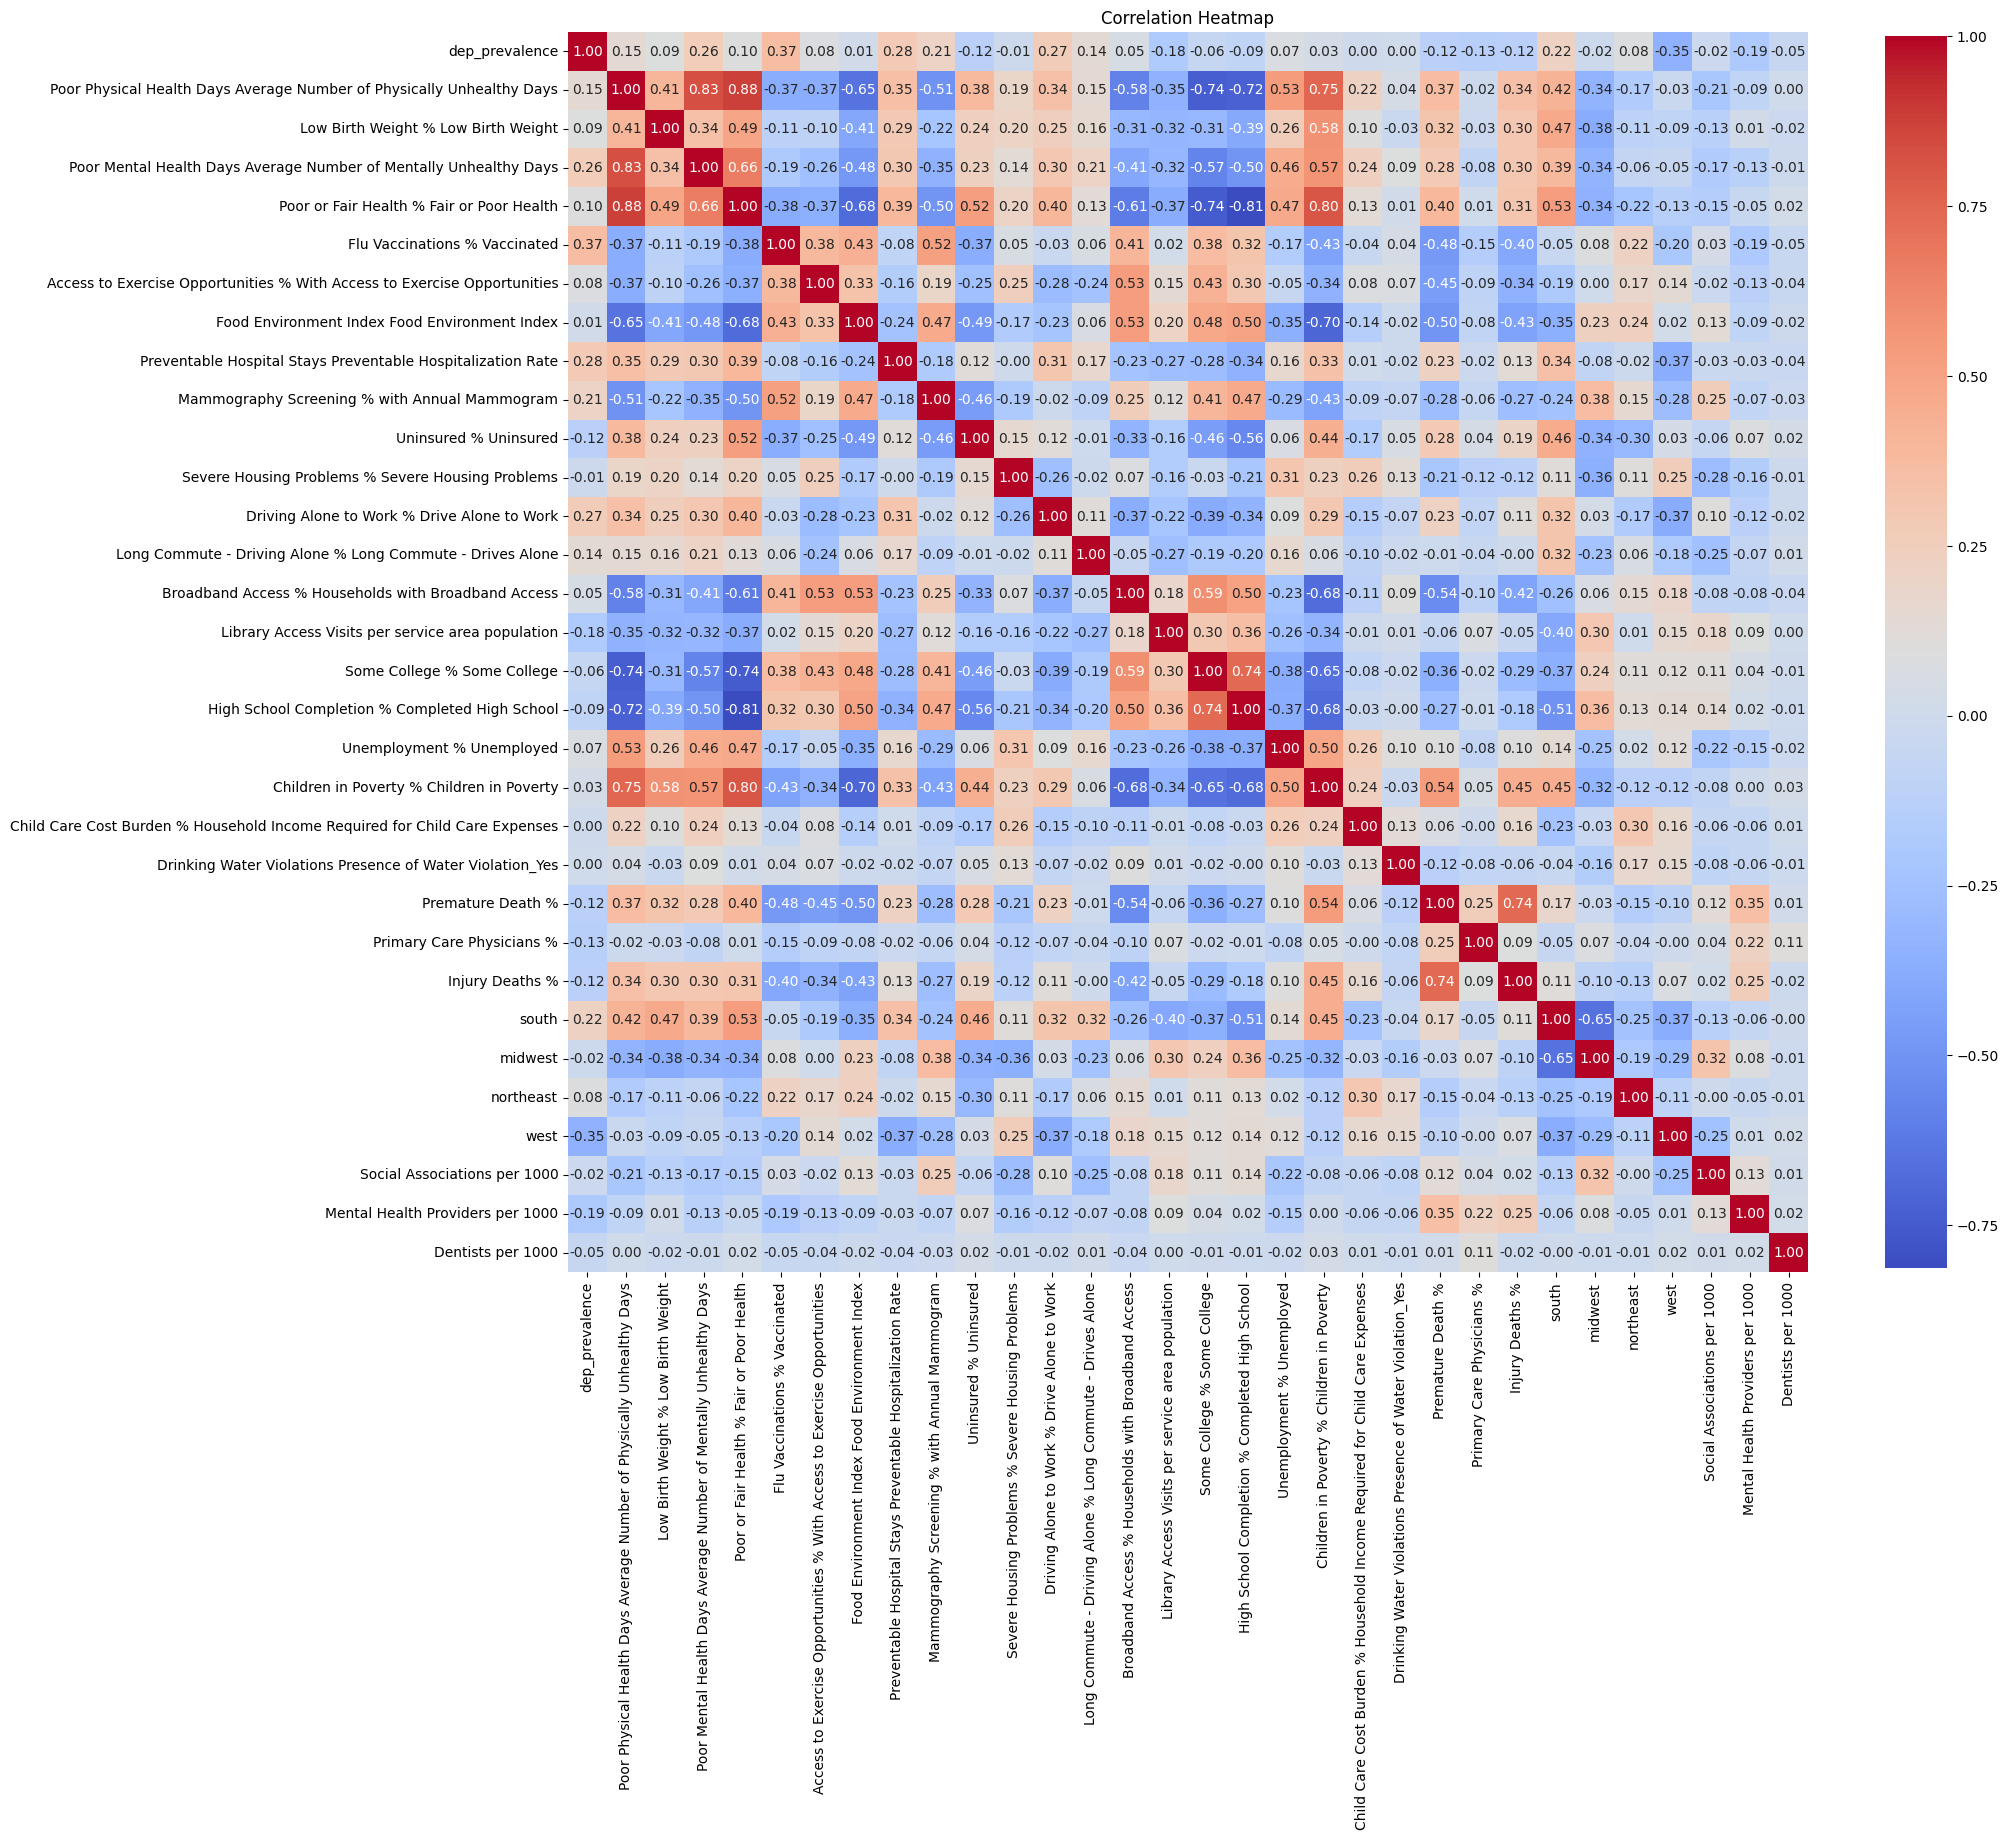

In [35]:
#Create a heatmap to visualize the correlation between the columns
plt.figure(figsize=(20, 20))
import seaborn as sns
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

In [36]:
df

,dep_prevalence,Poor Physical Health Days Average Number of Physically Unhealthy Days,Low Birth Weight % Low Birth Weight,Poor Mental Health Days Average Number of Mentally Unhealthy Days,Poor or Fair Health % Fair or Poor Health,Flu Vaccinations % Vaccinated,Access to Exercise Opportunities % With Access to Exercise Opportunities,Food Environment Index Food Environment Index,Preventable Hospital Stays Preventable Hospitalization Rate,Mammography Screening % with Annual Mammogram,Uninsured % Uninsured,Severe Housing Problems % Severe Housing Problems,Driving Alone to Work % Drive Alone to Work,Long Commute - Driving Alone % Long Commute - Drives Alone,Broadband Access % Households with Broadband Access,Library Access Visits per service area population,Some College % Some College,High School Completion % Completed High School,Unemployment % Unemployed,Children in Poverty % Children in Poverty,Child Care Cost Burden % Household Income Required for Child Care Expenses,Drinking Water Violations Presence of Water Violation_Yes,Premature Death %,Primary Care Physicians %,Injury Deaths %,south,midwest,northeast,west,Social Associations per 1000,Mental Health Providers per 1000,Dentists per 1000
0,18,0.349039,-2.788077,0.492505,-1.920671,0.36,0.429922,0.369938,0.637240,0.46,-2.676213,-1.699569,0.602860,0.421,0.611727,0.399425,0.613787,0.490756,-3.863864,-1.411347,-1.482624,False,0.663853,0.000430,-180.626153,1,0,0,0,0.160164,0.001003,0.014989
1,18,0.251963,-3.091867,0.532166,-1.970261,0.44,0.505884,0.458453,0.504830,0.45,-2.425664,-1.785873,0.464887,0.381,0.573926,0.538891,0.648479,0.547441,-3.822411,-1.524945,-1.596871,False,0.643623,0.000590,-153.771602,1,0,0,0,0.135884,0.003319,0.022974
2,19,0.607953,-2.475042,0.599553,-1.356802,0.39,0.433710,0.293388,0.568999,0.47,-2.233477,-1.684611,0.523978,0.375,0.188527,0.349378,0.440774,0.181731,-3.144491,-0.919684,-1.225954,False,0.748368,0.000406,-136.174655,1,0,0,0,0.128973,0.000783,0.016337
3,24,0.521987,-2.784943,0.647254,-1.501094,0.31,0.321136,0.442835,0.688227,0.36,-2.358872,-1.788305,0.710268,0.535,0.343585,0.387640,0.435332,0.224370,-3.743567,-1.263522,-1.295253,True,0.743396,0.000685,-117.661909,1,0,0,0,0.125399,0.001007,0.011496
4,22,0.464001,-3.184809,0.622503,-1.625312,0.37,0.310989,0.458453,0.417260,0.38,-2.197305,-1.892440,0.608236,0.614,0.407913,0.403517,0.526271,0.271783,-3.884903,-1.426126,-1.341975,False,0.724390,0.000201,-123.512670,1,0,0,0,0.106342,0.000784,0.008419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3160,14,0.242341,-2.761789,0.344337,-2.052992,0.39,0.893484,0.507452,0.357200,0.32,-2.139691,-1.858090,0.437730,0.195,0.553043,0.577023,0.623602,0.581126,-3.433045,-1.642440,-1.374296,True,0.672095,0.000436,-109.074715,0,0,0,1,0.115472,0.006877,0.030473
3161,10,0.061549,-3.164775,0.222333,-2.568629,0.56,0.988599,0.695149,0.340228,0.47,-1.979767,-1.577434,0.160171,0.117,0.639957,0.578732,0.771439,0.815939,-3.883644,-2.001379,-1.598616,True,0.142682,0.000941,-203.127472,0,0,0,1,0.296760,0.017694,0.053842
3162,15,0.224751,-2.673504,0.403026,-2.037483,0.35,0.528315,0.654502,0.433567,0.35,-2.100444,-1.976658,0.422059,0.172,0.609000,0.526316,0.596771,0.677510,-3.483420,-1.647333,-1.684640,True,0.658505,0.000579,-120.820144,0,0,0,1,0.041828,0.010508,0.043712
3163,13,0.218344,-3.471737,0.262734,-1.963039,0.34,0.679379,0.615438,0.394453,0.30,-1.999291,-2.022080,0.346498,0.096,0.410205,0.589472,0.701906,0.534802,-3.443298,-1.400429,-1.281518,False,0.665898,0.001034,-118.272173,0,0,0,1,0.224104,0.012471,0.045539
